In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('properties_FE.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,others,store room,pooja room,servant room,study room,furnishing_type,luxury_score
0,flat,sobha smriti apartments,sector 56,0.50,8333.0,600.0,Carpet area: 600 (55.74 sq.m.),1,1,2,...,NaN,NaN,600.0,0,0,0,0,0,1,0
1,house,ansal sushant lok plots,sector 43,11.50,17692.0,350.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000...,7,8,3+,...,NaN,9000.0,6500.0,0,1,1,1,0,0,31
2,flat,ss the leaf,sector 85,1.20,12371.0,970.0,Super Built up area 1671(155.24 sq.m.)Built Up...,2,2,2,...,1671.0,1190.0,970.0,0,1,0,1,0,1,81
3,flat,dlf regency park,sector 28,2.35,13224.0,1777.0,Super Built up area 1777(165.09 sq.m.)Built Up...,3,4,3,...,1777.0,1700.0,1600.0,0,0,0,1,0,0,109
4,flat,dlf the primus,sector 82a,2.20,10516.0,2092.0,Super Built up area 2092(194.35 sq.m.),3,3,3+,...,2092.0,NaN,NaN,0,0,0,1,0,2,174


In [3]:
df.shape

(3785, 23)

<Axes: xlabel='property_type'>

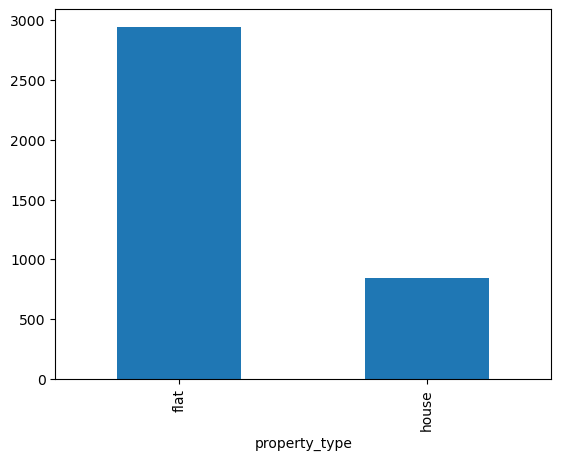

In [4]:
df['property_type'].value_counts().plot(kind='bar',)

In [5]:
df['society'].value_counts().shape

(661,)

In [6]:
df['society'].value_counts()

society
independent                             482
tulip violet                             75
ss the leaf                              74
shapoorji pallonji joyville gurugram     45
signature global park                    43
                                       ... 
shree balaji appartment                   1
bhawani enclave                           1
naman residency                           1
baani city center                         1
the arzoo cghs                            1
Name: count, Length: 661, dtype: int64

In [7]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.022707
ss the leaf                             0.045111
shapoorji pallonji joyville gurugram    0.058734
signature global park                   0.071753
dlf new town heights                    0.084469
                                          ...   
the close north                         0.496216
imperia the esfera                      0.500454
mvn athens                              0.504693
ats kocoon                              0.508629
ireo the corridors                      0.512564
Name: proportion, Length: 75, dtype: float64

In [8]:
# Categorise societies based on population
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(97),
 'Low (2-9)': np.int64(274),
 'Very Low (1)': np.int64(287)}

<Axes: xlabel='society'>

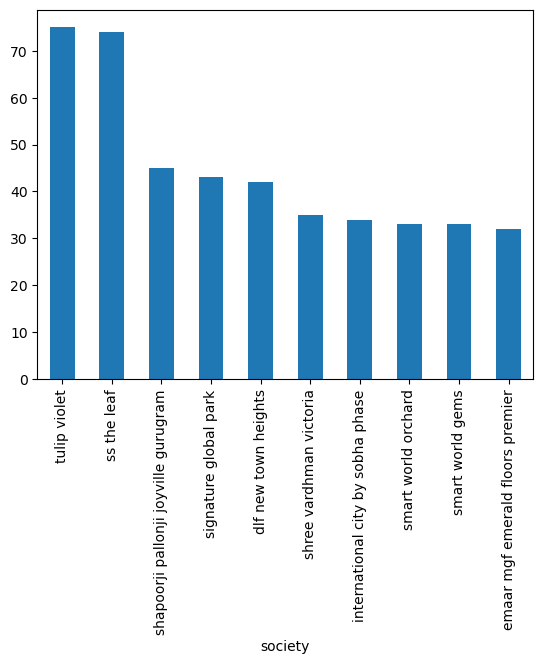

In [9]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [10]:
# unique sectors
df['sector'].value_counts().shape

(110,)

<Axes: xlabel='sector'>

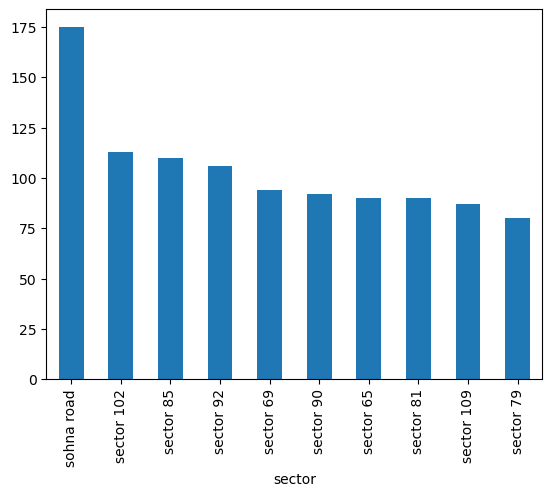

In [11]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [12]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(4),
 'High (50-100)': np.int64(25),
 'Average (10-49)': np.int64(61),
 'Low (2-9)': np.int64(20),
 'Very Low (1)': np.int64(0)}

In [13]:
df['price'].describe()

count    3785.000000
mean        2.505804
std         2.950121
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

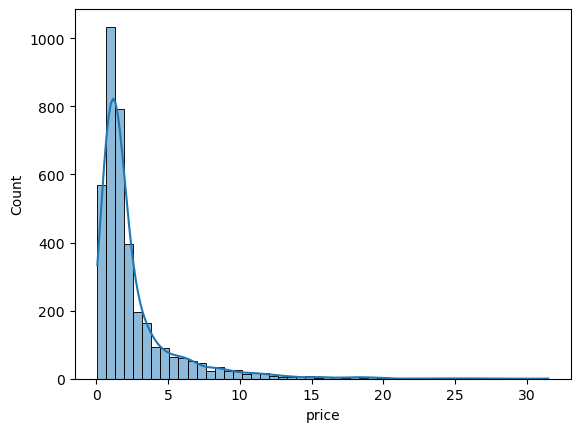

In [14]:
sns.histplot(df['price'], kde=True, bins=50)

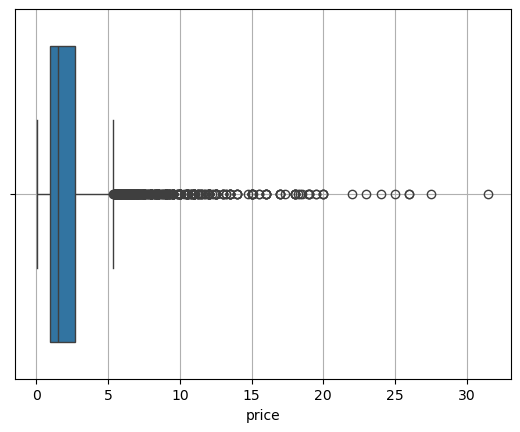

In [15]:
sns.boxplot(x=df['price'])
plt.grid()

In [16]:
# Skewness and Kurtosis
skewness = df['price'].skew() # The price distribution has a skewness of approximately 3.28, indicating a positive skew.
kurtosis = df['price'].kurt() # A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

print(skewness,kurtosis)

3.3113346542178137 15.257818585808831


In [17]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

np.float64(1.7600000000000002)

In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7000000000000006 5.340000000000001


In [19]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(432, 23)

In [20]:
outliers['price'].describe()

count    432.000000
mean       9.196157
std        4.061291
min        5.350000
25%        6.400000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64

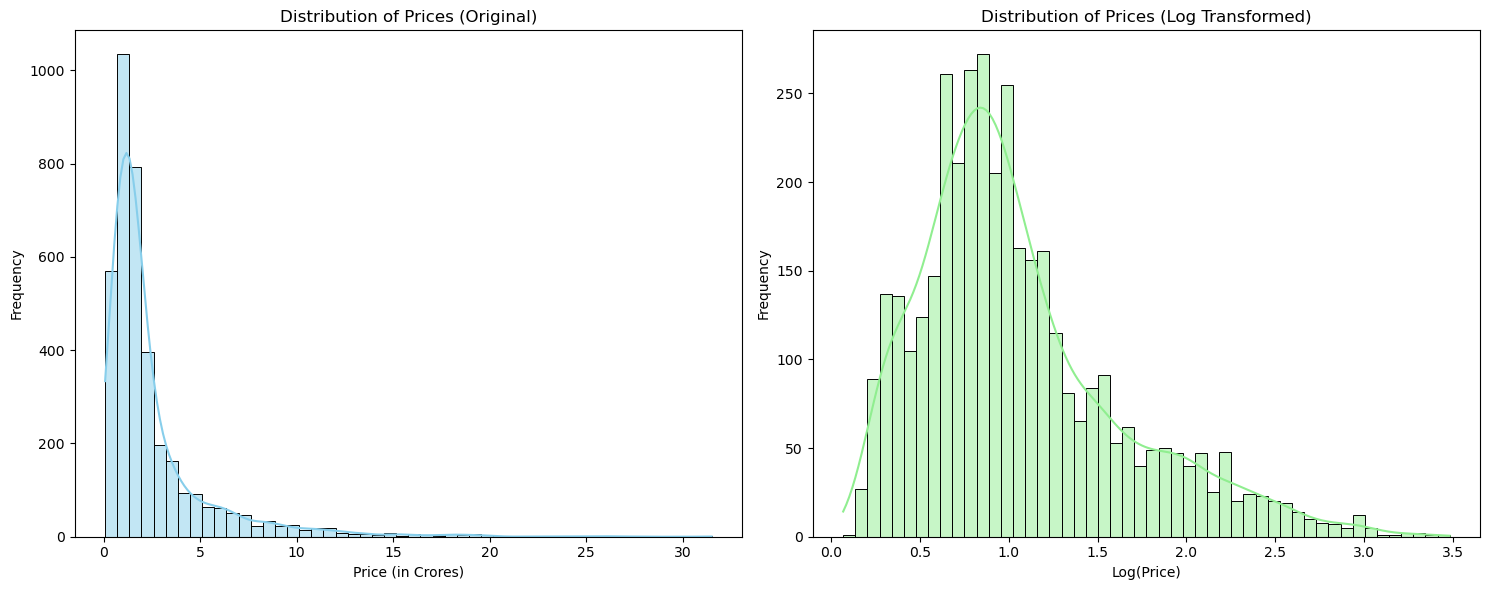

In [21]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0830237140465715 1.006599721590867


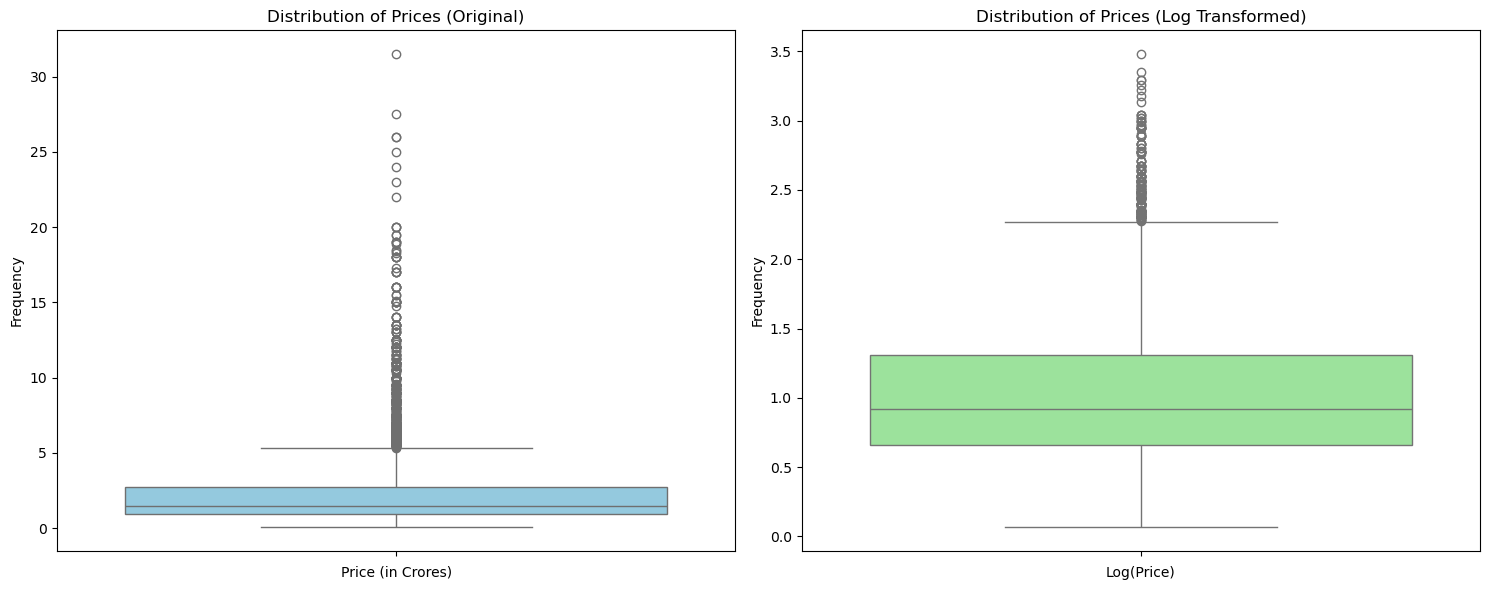

In [23]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
df['price_per_sqft'].isnull().sum()

np.int64(0)

In [25]:
df['price_per_sqft'].describe()

count      3785.000000
mean      13800.167768
std       23052.005585
min           4.000000
25%        6808.000000
50%        9000.000000
75%       13765.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

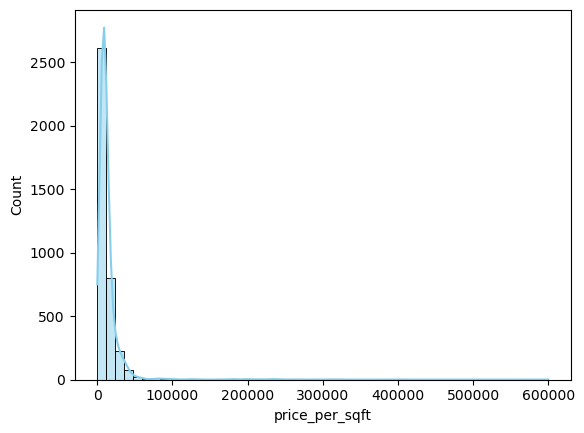

In [26]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='price_per_sqft'>

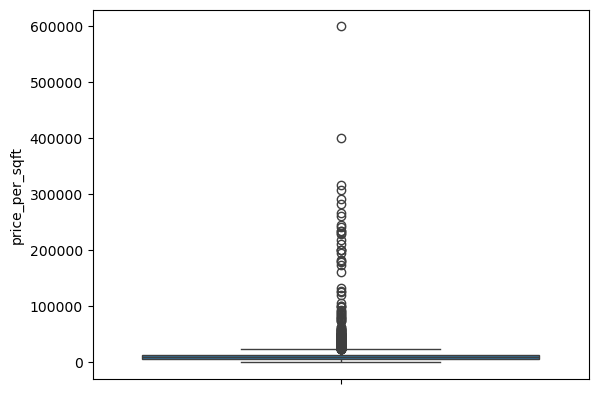

In [27]:
sns.boxplot(df['price_per_sqft'])

<Axes: xlabel='bedRoom'>

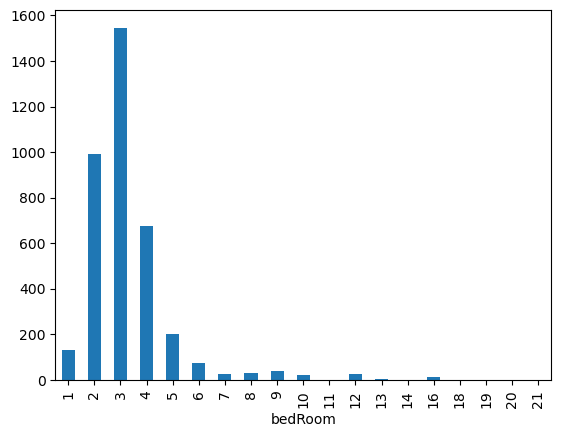

In [28]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

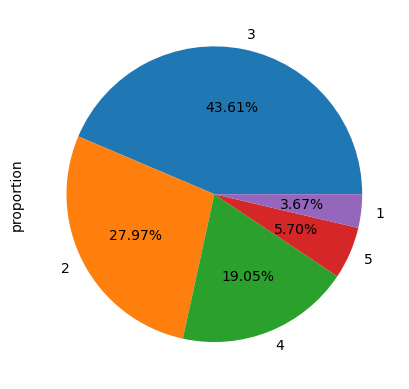

In [29]:

df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='bathroom'>

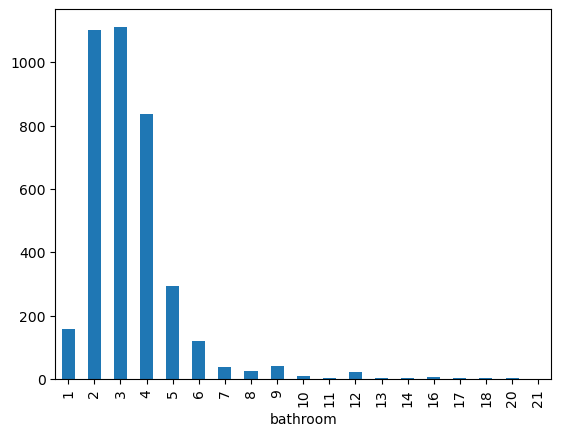

In [30]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

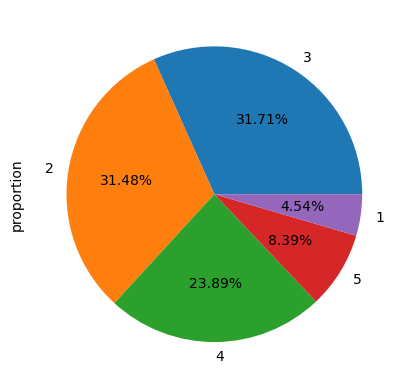

In [31]:

df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='balcony'>

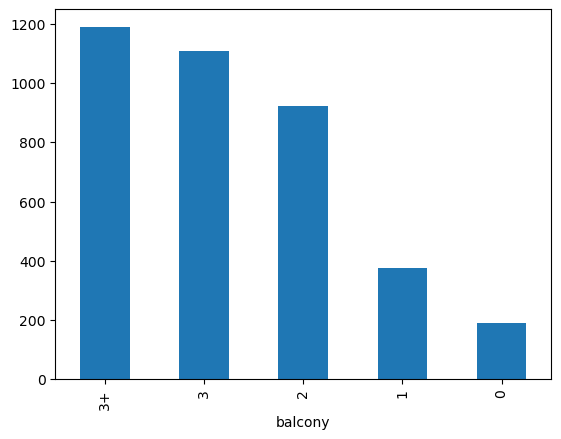

In [32]:

df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

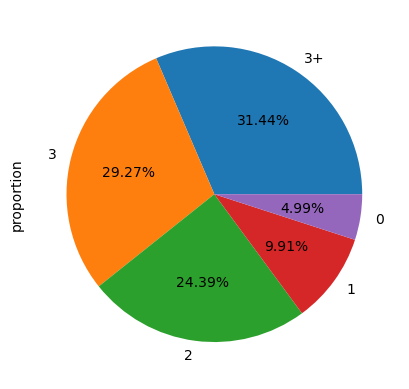

In [33]:

df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [34]:

df['floorNum'].isnull().sum()

np.int64(19)

In [35]:

df['floorNum'].describe()

count    3766.000000
mean        6.827403
std         6.035042
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

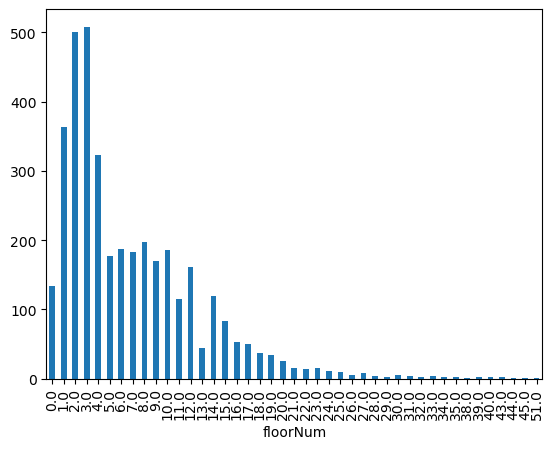

In [36]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='floorNum'>

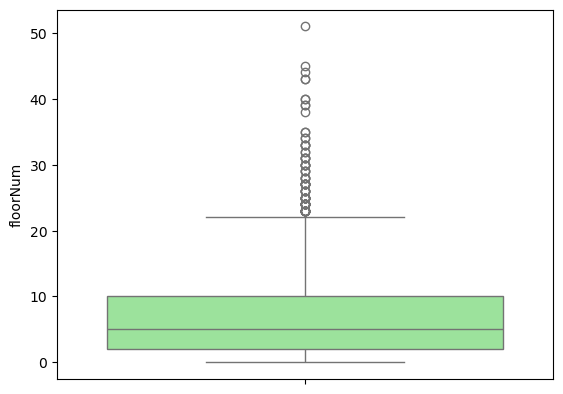

In [37]:
sns.boxplot(df['floorNum'], color='lightgreen')

In [38]:
df['facing'].value_counts()

facing
not available    1099
East              639
North-East        637
North             397
West              252
South             233
North-West        199
South-East        172
South-West        157
Name: count, dtype: int64

In [39]:
df['agePossession'].value_counts()

agePossession
Relatively New        1669
New Property           623
Moderately Old         570
Undefined              483
Old Property           309
Under Construction     131
Name: count, dtype: int64

In [40]:
df['super_built_up_area'].isnull().sum()

np.int64(1870)

In [41]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

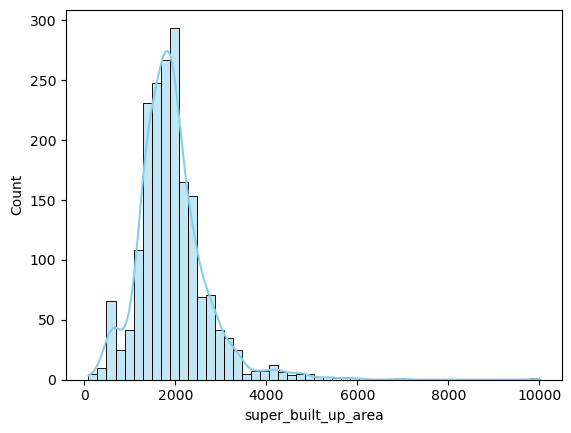

In [42]:

sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='super_built_up_area'>

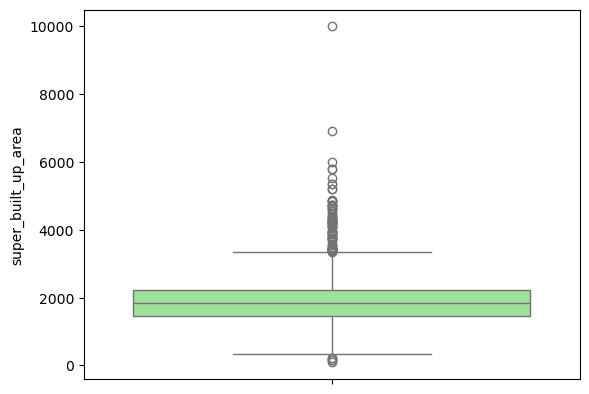

In [43]:

sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

In [44]:
# built up area
df['built_up_area'].isnull().sum()

np.int64(2069)

In [45]:
df['built_up_area'].describe()

count      1716.000000
mean       3323.578933
std       18467.129082
min          18.000000
25%        1250.000000
50%        1797.000000
75%        2700.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

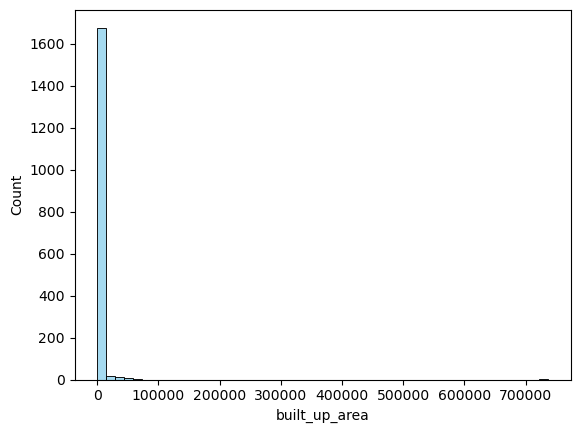

In [46]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

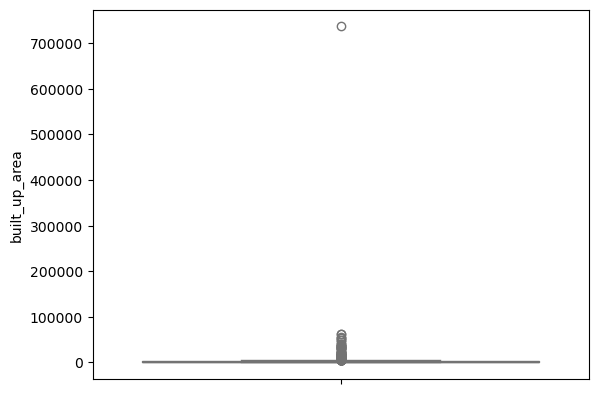

In [47]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

In [48]:
# carpet area
df['carpet_area'].isnull().sum()

np.int64(1844)

In [49]:
df['carpet_area'].describe()

count      1941.000000
mean       2486.675723
std       22392.383362
min          15.000000
25%         830.000000
50%        1295.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

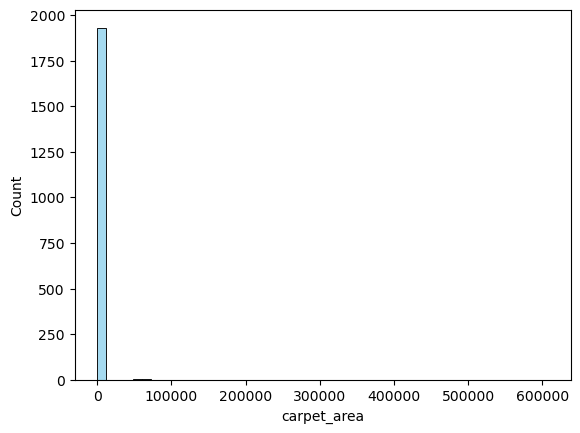

In [50]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

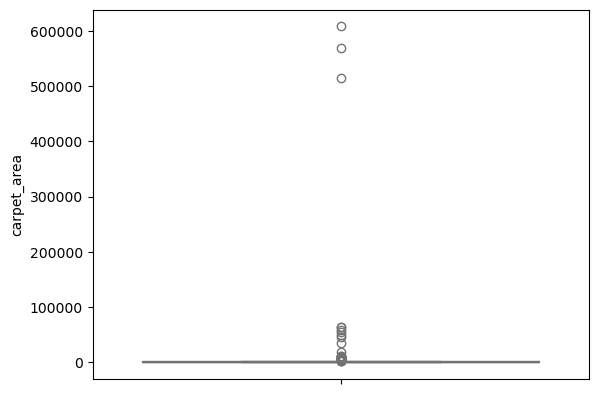

In [51]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

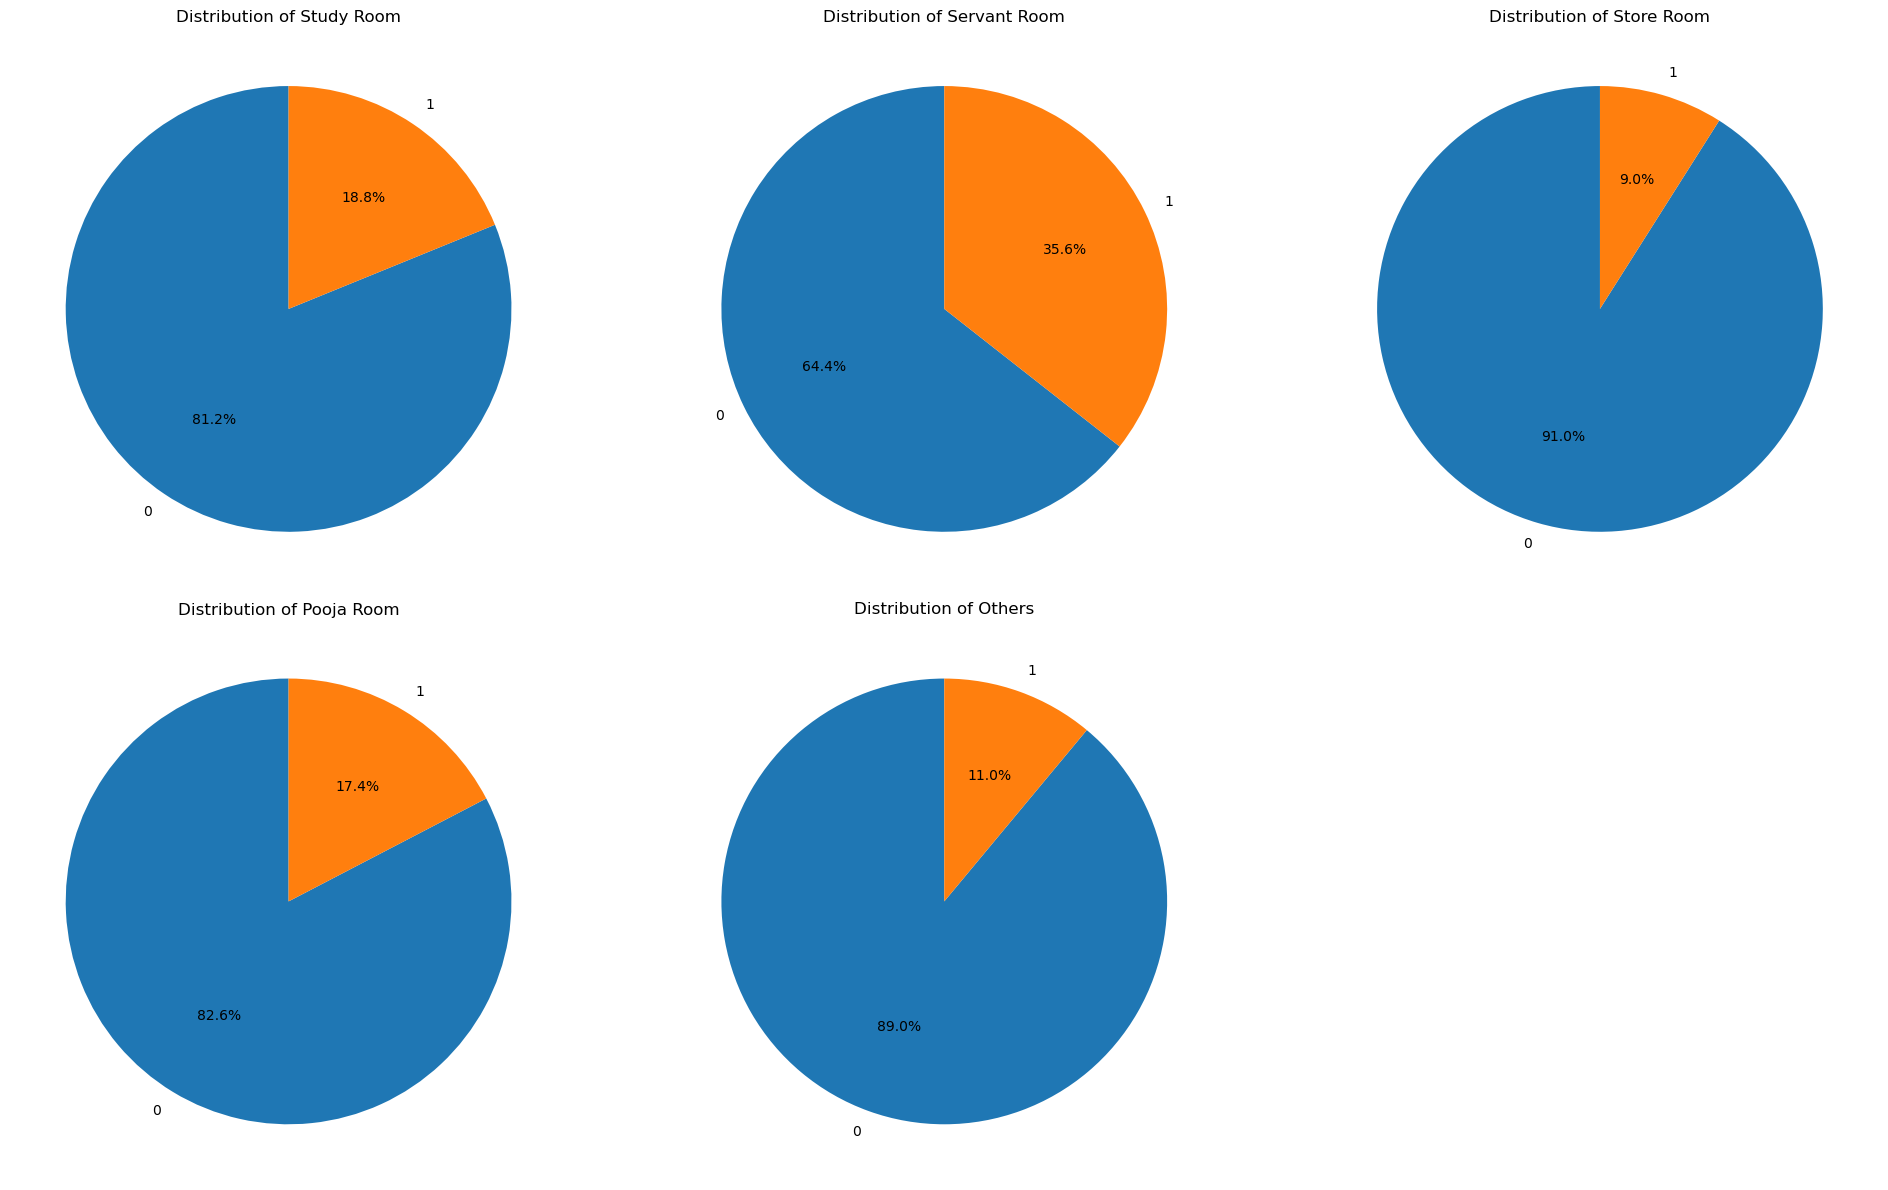

In [52]:

plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [53]:

df['furnishing_type'].value_counts()

furnishing_type
0    2054
1    1514
2     217
Name: count, dtype: int64

<Axes: ylabel='count'>

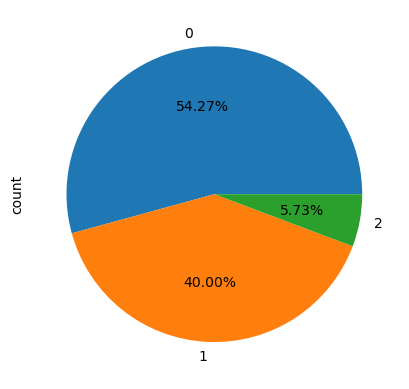

In [54]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [55]:
df['luxury_score'].describe()

count    3785.000000
mean       70.676618
std        53.061769
min         0.000000
25%        31.000000
50%        58.000000
75%       109.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

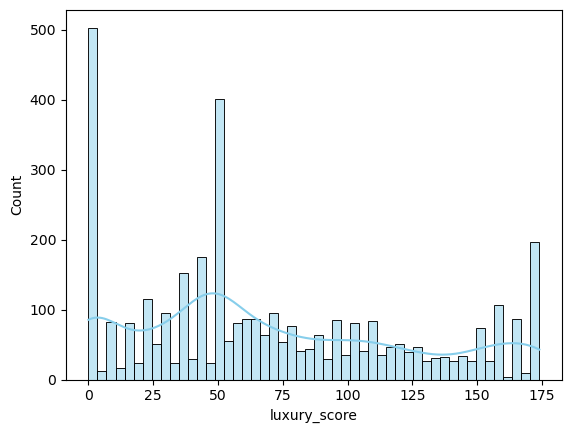

In [56]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

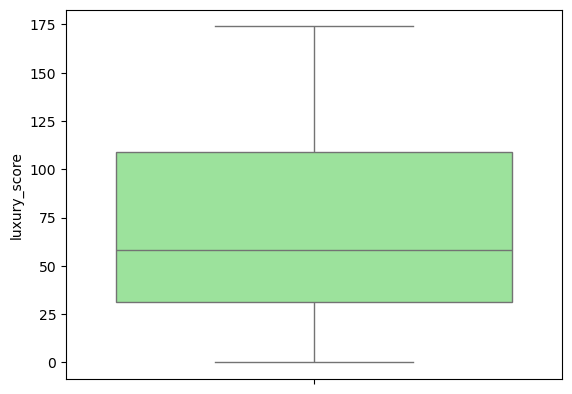

In [57]:
sns.boxplot(df['luxury_score'], color='lightgreen')

In [58]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,others,store room,pooja room,servant room,study room,furnishing_type,luxury_score
0,flat,sobha smriti apartments,sector 56,0.50,8333.0,600.0,Carpet area: 600 (55.74 sq.m.),1,1,2,...,NaN,NaN,600.0,0,0,0,0,0,1,0
1,house,ansal sushant lok plots,sector 43,11.50,17692.0,350.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000...,7,8,3+,...,NaN,9000.0,6500.0,0,1,1,1,0,0,31
2,flat,ss the leaf,sector 85,1.20,12371.0,970.0,Super Built up area 1671(155.24 sq.m.)Built Up...,2,2,2,...,1671.0,1190.0,970.0,0,1,0,1,0,1,81
3,flat,dlf regency park,sector 28,2.35,13224.0,1777.0,Super Built up area 1777(165.09 sq.m.)Built Up...,3,4,3,...,1777.0,1700.0,1600.0,0,0,0,1,0,0,109
4,flat,dlf the primus,sector 82a,2.20,10516.0,2092.0,Super Built up area 2092(194.35 sq.m.),3,3,3+,...,2092.0,NaN,NaN,0,0,0,1,0,2,174
